In [2]:
import pandas as pd
import regex as re

In [3]:
df = pd.read_csv('American city ranking - Routes no stops1.csv')

In [4]:
print(df.shape)
df.head()

(120, 14)


Larger City  Second City Population City 1 Population City 2  Population  \
0  Mexico City     Acapulco               NaN               NaN  21,000,000   
1       Boston       Albany         7,991,371               NaN   9,000,000   
2     New York       Albany        23,362,099               NaN  25,000,000   
3    Rochester       Albany               NaN               NaN   2,900,000   
4       Denver  Albuquerque               NaN               NaN   4,300,000   

   Distance (km)      Estimated Cost Cost per person Cost per person per km  \
0            380   $7,600,000,000.00         $361.90                  $0.95   
1            273   $5,460,000,000.00         $606.67                  $2.22   
2            245   $4,900,000,000.00         $196.00                  $0.80   
3            365   $7,300,000,000.00       $2,517.24                  $6.90   
4            723  $14,460,000,000.00       $3,362.79                  $4.65   

       Time  Direction  $889,360,000,000.00  $1,573.35  Redundant to:  
0  1.266667        NaN                  NaN        NaN            NaN  
1  0.910000        NaN                  NaN        NaN            NaN  
2  0.816667        NaN                  NaN        NaN            NaN  
3  1.216667        NaN                  NaN        NaN            NaN  
4  2.410000        NaN                  NaN        NaN            NaN

In [5]:
df['City 1'] = df['Larger City']
df['City 2'] = df['Second City']
df2 = df
df2['City 2'] = df2['Larger City']
df2['City 1'] = df2['Second City']
df3 = pd.concat([df, df2])
df3.shape

(240, 16)

In [6]:
df['Population'] = [int(x.replace(',','')) for x in df['Population']]
sum(df['Population'])

924400000

In [7]:
(float(sum(df['Population'])) / float(324000000+34000000+127500000))/float(2)

0.9520082389289393

In [8]:
df3['City 1'].value_counts()

Louisville               8
San Luis Potosi          6
Salt Lake City           6
Albany                   6
Harrisburg               6
El Paso                  6
Birmingham               6
Santiago de Queretaro    6
Tegulcigalpa             6
Little Rock              6
Richmond                 6
Buffalo                  6
Columbus, Ohio           4
San Antonio              4
New Orleans              4
Tulsa                    4
Austin                   4
Chattanooga              4
Cincinnati               4
Las Vegas                4
Philadelphia             4
Greensboro               4
Jacksonville             4
Cleveland                4
Greenville               4
Indianapolis             4
Milwaukee                4
Hartford                 4
Knoxville                4
McAllen                  4
                        ..
Orlando                  2
Managua                  2
Puebla                   2
Torreon                  2
Ottawa                   2
Phoenix                  2
S

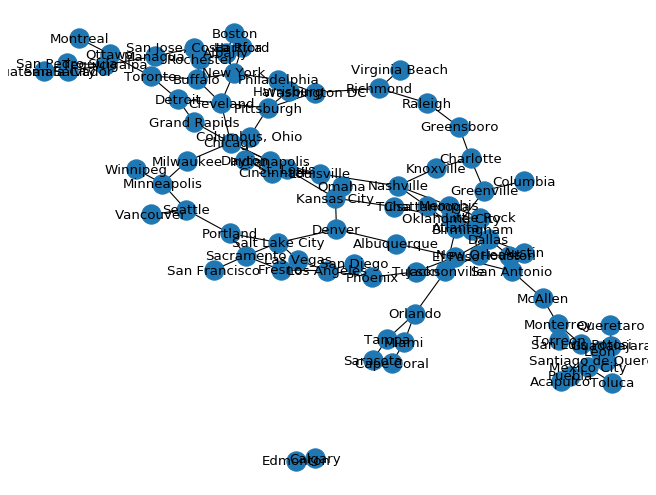

In [17]:
# https://python-graph-gallery.com/network-chart/
# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Build your graph
G=nx.from_pandas_edgelist(df, 'Larger City','Second City')

# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [10]:
df.columns

Index(['Larger City', 'Second City', 'Population City 1', 'Population City 2',
       'Population', 'Distance (km)', 'Estimated Cost', 'Cost per person',
       'Cost per person per km', 'Time', 'Direction', '$889,360,000,000.00',
       '$1,573.35', 'Redundant to:', 'City 1', 'City 2'],
      dtype='object')